# Notebook 3 — Data Frames, CSV y Pipelines (R para IA)

## Objetivos medibles (al finalizar podrás…)

1. Crear un `tibble` y comprobar su estructura con `head()`, `glimpse()` y `summary()`.
2. Aplicar los verbos clave de `dplyr` (`select`, `filter`, `arrange`, `mutate`) usando **pipes** (`%>%` o `|>`).
3. Calcular resúmenes con `summarise()` y agregaciones por grupos con `group_by()`.
4. Importar y exportar datos en CSV con `readr` (`read_csv`, `write_csv`).
5. Realizar una exploración visual rápida con gráficos base.
6. Conectar estas operaciones con el **preprocesado típico en IA** (limpieza, filtrado, creación de variables, agregación).

## Requisitos previos

* Notebook 1 (variables y tipos)
* Notebook 2 (vectores, indexado, filtrado lógico)


---

## 0) Preparación: el universo “Tidy”

En Python, para trabajar con datos, usáis principalmente **`pandas`**.
En R, el enfoque moderno para trabajar con datos se basa en el **ecosistema *tidy***.

Para ello cargamos el paquete **`tidyverse`**, que agrupa varias librerías pensadas para:

* manipular datos,
* leer y escribir ficheros,
* visualizar información,
* y construir flujos de trabajo claros y reproducibles.

---

### ¿Qué es `tidyverse`?

`tidyverse` no es una sola librería, sino un **conjunto de paquetes** que funcionan de forma coherente entre sí.

Incluye, entre otros:

* **`dplyr`** → manipulación de datos (filtrar, seleccionar, agrupar, transformar)
* **`readr`** → lectura y escritura de ficheros (CSV)
* **`ggplot2`** → visualización de datos
* **`tibble`** → versión moderna de los data frames
* **`tidyr`** → limpieza y reorganización de datos

Es el equivalente funcional a usar `pandas + matplotlib/seaborn` en Python, pero integrado desde el diseño.

---

### ¿Por qué usar el enfoque *tidy* en IA?

El enfoque *tidy* se basa en:

* código **legible**,
* operaciones encadenadas paso a paso,
* una forma clara de pensar en los datos.

Esto encaja muy bien con proyectos de IA, donde:

* los datos pasan por varias transformaciones,
* es importante entender qué se hace en cada paso,
* y reproducir el proceso es clave.

💡 **Idea clave**

> En R, el *tidyverse* permite construir **pipelines de datos** claros y fáciles de mantener.

---

### Cargar el tidyverse

Para empezar, cargamos el paquete:



In [1]:
library(tidyverse) 
# Verás que carga varios paquetes. Eso es bueno.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.2.0     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.2     ✔ tibble    3.3.1
✔ lubridate 1.9.5     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


> Nota: si aparece “Conflicts” (por ejemplo `filter()`), no pasa nada. Usaremos `dplyr::filter()` si fuese necesario.

A partir de aquí podremos usar:

* data frames modernos (`tibble`),
* operaciones con `dplyr`,
* lectura de CSV con `readr`,
* y visualización básica.

---


### 1) Crear un Data Frame (tibble)

En R, los datos tabulares (filas y columnas) se almacenan en **data frames**.
Dentro del ecosistema *tidyverse*, la versión moderna de los data frames se llama **`tibble`**.

Un **tibble** es, en esencia, una **tabla de datos**, muy similar a:

* una hoja de cálculo,
* un `DataFrame` de `pandas` en Python,
* o una tabla de una base de datos.

---

### ¿Qué diferencia hay entre un data frame y un tibble?

Un **tibble** se comporta casi igual que un data frame clásico, pero es más cómodo y seguro:

*  No imprime miles de filas por error en la consola
*  Muestra información clara sobre columnas y tipos
*  Evita conversiones automáticas inesperadas
*  Facilita entender rápidamente la estructura de los datos

Por eso es el formato recomendado para **análisis de datos e IA** en R moderno.


In [2]:
# Creamos el dataset de alumnos (igual que antes)
alumnos_df <- tibble(
  nombre = c("Ana", "Luis", "Marta", "Hugo", "Sara", "Noah", "Elena", "Iker"),
  edad = c(17, 18, 17, 19, 18, 17, 20, 18),
  nota = c(6.5, 4.2, 8.1, 5.0, 9.3, 3.8, 7.2, 6.0),
  asistencia = c(92, 70, 95, 88, 98, 60, 88, 85)
)

# Al imprimirlo, fíjate que te dice el tipo de dato de cada columna (dbl, chr)
alumnos_df


nombre,edad,nota,asistencia
<chr>,<dbl>,<dbl>,<dbl>
Ana,17,6.5,92
Luis,18,4.2,70
Marta,17,8.1,95
Hugo,19,5.0,88
Sara,18,9.3,98
Noah,17,3.8,60
Elena,20,7.2,88
Iker,18,6.0,85



### Inspección rápida de un data frame

Antes de entrenar cualquier modelo de Inteligencia Artificial, el primer paso siempre es **mirar los datos**.
En R tenemos varias funciones muy útiles para hacer una inspección rápida de un `tibble` o `data frame`.

---

**`head()`**
  Muestra las primeras filas del conjunto de datos.
  Sirve para comprobar:

  * si los datos se han cargado bien,
  * si las columnas tienen sentido,
  * si hay valores raros a simple vista.

---



In [3]:
head(alumnos_df)

nombre,edad,nota,asistencia
<chr>,<dbl>,<dbl>,<dbl>
Ana,17,6.5,92
Luis,18,4.2,70
Marta,17,8.1,95
Hugo,19,5.0,88
Sara,18,9.3,98
Noah,17,3.8,60


**`glimpse()`**
  Muestra una visión general del data frame:

  * nombre de las columnas,
  * tipo de cada variable,
  * algunos valores de ejemplo.

  Es especialmente útil para detectar:

  * errores de tipo (texto donde debería haber números),
  * columnas mal interpretadas.

In [4]:
glimpse(alumnos_df)

Rows: 8
Columns: 4
$ nombre     <chr> "Ana", "Luis", "Marta", "Hugo", "Sara", "Noah", "Elena", "I…
$ edad       <dbl> 17, 18, 17, 19, 18, 17, 20, 18
$ nota       <dbl> 6.5, 4.2, 8.1, 5.0, 9.3, 3.8, 7.2, 6.0
$ asistencia <dbl> 92, 70, 95, 88, 98, 60, 88, 85


**`summary()`**
  Calcula un resumen estadístico de cada columna:

  * mínimos y máximos,
  * medias,
  * valores faltantes (`NA`),
  * frecuencias en variables categóricas.

In [5]:
summary(alumnos_df)

    nombre               edad            nota         asistencia   
 Length:8           Min.   :17.00   Min.   :3.800   Min.   :60.00  
 Class :character   1st Qu.:17.00   1st Qu.:4.800   1st Qu.:81.25  
 Mode  :character   Median :18.00   Median :6.250   Median :88.00  
                    Mean   :18.00   Mean   :6.263   Mean   :84.50  
                    3rd Qu.:18.25   3rd Qu.:7.425   3rd Qu.:92.75  
                    Max.   :20.00   Max.   :9.300   Max.   :98.00  

---

### 2) El arma secreta: la tubería (*pipe*)

En el enfoque *tidy*, una de las ideas más importantes es la **tubería** o *pipe*.

El operador **`%>%`** (o el más moderno **`|>`**) coge el resultado de la izquierda
y lo **pasa como primer argumento** a la función de la derecha.

Esto permite escribir el código **en forma de pasos**, de arriba a abajo.

---

### Cómo se lee un pipe

Un pipe se puede leer como:

> **“… y entonces …”**

Es decir:

* toma estos datos
* **y entonces** haz esto
* **y entonces** haz aquello

---

### Comparación con Python

En Python, esto se conoce como **method chaining**:

```python
df.filter(...)
  .groupby(...)
  .mean()
```

En R, el pipe cumple exactamente ese papel, pero de forma más general y legible.

---

### Ejemplo conceptual (sin datos)

```r
yo %>% 
  despertar() %>% 
  desayunar() %>% 
  trabajar()
```

Cada paso:

* recibe el resultado del anterior,
* lo transforma,
* y lo pasa al siguiente.

---

### ¿Por qué el pipe es clave en IA?

En proyectos reales de Inteligencia Artificial:

* los datos pasan por **muchas transformaciones**,
* cada paso importa,
* y es fundamental entender **qué ocurre en cada fase**.

El pipe permite construir **pipelines de datos claros y reproducibles**, por ejemplo:

* cargar datos,
* filtrar registros,
* crear nuevas variables,
* agrupar y resumir información.

---

### `%>%` vs `|>`

* **`%>%`** → pipe clásico de `tidyverse`
* **`|>`** → pipe base de R (más reciente)

En este cuaderno usaremos **uno de ellos de forma consistente**,
pero la idea es exactamente la misma.



---

## 3) Los 4 verbos principales de `dplyr`

En `pandas` solemos trabajar pensando en **operaciones sobre un DataFrame**.
En `dplyr`, el trabajo con datos se basa en **verbos** que describen *qué queremos hacer* con una tabla.

La idea es la misma, pero el código se lee de forma más natural.

Vamos a traducir mentalmente **pandas → tidyverse**.

---

### A) `select()` — Elegir columnas

Sirve para **quedarnos solo con las columnas que nos interesan**.

Esto es muy habitual en IA, por ejemplo cuando:

* seleccionamos las *features*,
* eliminamos columnas irrelevantes,
* preparamos los datos para un modelo.

---

#### En Python (pandas)

```python
df[['nombre', 'nota']]
```

---

#### En R (dplyr)

```r
df |> select(nombre, nota)
```

---





In [6]:
# Selecciona solo nombre y nota
alumnos_df |> 
  select(nombre, nota)

nombre,nota
<chr>,<dbl>
Ana,6.5
Luis,4.2
Marta,8.1
Hugo,5.0
Sara,9.3
Noah,3.8
Elena,7.2
Iker,6.0


### Cómo se lee

> “Toma el data frame `df`
> **y entonces** selecciona las columnas `nombre` y `nota`”

---

### Detalle importante

En `select()`:

* **no se usan comillas** para los nombres de columnas,
* se escriben tal cual aparecen en el data frame.

Esto es distinto a pandas y suele causar errores al principio.

---

#### B) `filter()` — Elegir filas (condiciones)

`filter()` se usa para **quedarnos solo con las filas que cumplen una condición**.

En IA y análisis de datos esto es muy habitual, por ejemplo para:

* eliminar datos incorrectos,
* quedarnos solo con ciertos casos,
* aplicar umbrales,
* separar subconjuntos de datos.

---

### En Python (pandas)

```python
df[df['nota'] >= 5]
```

---

### En R (dplyr)

```r
df |> filter(nota >= 5)
```

---

### Cómo se lee

> “Toma el data frame `df`
> **y entonces** quédate solo con las filas donde `nota` sea mayor o igual que 5”

---

### ¿Por qué se dice que es más limpio?

* No hay corchetes anidados
* No se repite el nombre del data frame
* La condición se lee casi como una frase

Esto hace que los **pipelines de datos sean más fáciles de entender y mantener**.

---

### Ejemplo más cercano a IA

```r
df |> filter(probabilidad >= 0.5)
```

Esto simula:

* aplicar un **umbral**,
* seleccionar predicciones positivas,
* filtrar resultados de un modelo.


---

### Error típico

En `filter()`:

* no se usan comillas para el nombre de la columna,
* se usan comparadores normales (`>`, `<`, `>=`, `==`).




In [7]:
# Alumnos aprobados
alumnos_df %>% 
  filter(nota >= 5)

# Aprobados Y con buena asistencia (la coma actúa como AND)
alumnos_df %>% 
  filter(nota >= 5, asistencia > 80)


nombre,edad,nota,asistencia
<chr>,<dbl>,<dbl>,<dbl>
Ana,17,6.5,92
Marta,17,8.1,95
Hugo,19,5.0,88
Sara,18,9.3,98
Elena,20,7.2,88
Iker,18,6.0,85


nombre,edad,nota,asistencia
<chr>,<dbl>,<dbl>,<dbl>
Ana,17,6.5,92
Marta,17,8.1,95
Hugo,19,5.0,88
Sara,18,9.3,98
Elena,20,7.2,88
Iker,18,6.0,85



---

#### B) `filter()` — Elegir filas (condiciones)

`filter()` se usa para **quedarnos solo con las filas que cumplen una condición**.

En IA y análisis de datos esto es muy habitual, por ejemplo para:

* eliminar datos incorrectos,
* quedarnos solo con ciertos casos,
* aplicar umbrales,
* separar subconjuntos de datos.

---

### En Python (pandas)

```python
df[df['nota'] >= 5]
```

---

### En R (dplyr)

```r
df |> filter(nota >= 5)
```

---

### Cómo se lee

> “Toma el data frame `df`
> **y entonces** quédate solo con las filas donde `nota` sea mayor o igual que 5”

---

### ¿Por qué se dice que es más limpio?

* No hay corchetes anidados
* No se repite el nombre del data frame
* La condición se lee casi como una frase

👉 Esto hace que los **pipelines de datos sean más fáciles de entender y mantener**.

---

### Ejemplo más cercano a IA

```r
df |> filter(probabilidad >= 0.5)
```

Esto simula:

* aplicar un **umbral**,
* seleccionar predicciones positivas,
* filtrar resultados de un modelo.

---

### Idea clave para IA

> `filter()` es una de las herramientas básicas para **limpiar y preparar datasets**
> antes de entrenar un modelo.

---

### Error típico 

En `filter()`:

* no se usan comillas para el nombre de la columna,
* se usan comparadores normales (`>`, `<`, `>=`, `==`).



In [8]:
# Ordenar por nota ascendente
alumnos_df %>% 
  arrange(nota)

# Ordenar por nota DESCENDENTE (desc)
alumnos_df %>% 
  arrange(desc(nota))


nombre,edad,nota,asistencia
<chr>,<dbl>,<dbl>,<dbl>
Noah,17,3.8,60
Luis,18,4.2,70
Hugo,19,5.0,88
Iker,18,6.0,85
Ana,17,6.5,92
Elena,20,7.2,88
Marta,17,8.1,95
Sara,18,9.3,98


nombre,edad,nota,asistencia
<chr>,<dbl>,<dbl>,<dbl>
Sara,18,9.3,98
Marta,17,8.1,95
Elena,20,7.2,88
Ana,17,6.5,92
Iker,18,6.0,85
Hugo,19,5.0,88
Luis,18,4.2,70
Noah,17,3.8,60


#### D. `mutate()`: Crear o modificar columnas

*Python:* `df['nueva'] = ...`


In [9]:
# Crear una columna de "puntos extra" y otra de "aprobado" (lógica)
alumnos_df %>% 
  mutate(
    puntos_extra = nota * 1.1,
    es_aprobado = nota >= 5
  )


nombre,edad,nota,asistencia,puntos_extra,es_aprobado
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Ana,17,6.5,92,7.15,TRUE
Luis,18,4.2,70,4.62,FALSE
Marta,17,8.1,95,8.91,TRUE
Hugo,19,5.0,88,5.50,TRUE
Sara,18,9.3,98,10.23,TRUE
Noah,17,3.8,60,4.18,FALSE
Elena,20,7.2,88,7.92,TRUE
Iker,18,6.0,85,6.60,TRUE


> Importante: **esto no cambia `alumnos_df`** si no asignas con `<-`.


## 4) `summarise()` y `group_by()` (imprescindible en datos para IA)

### Resumen global


In [10]:
alumnos_df |>
  summarise(
    nota_media = mean(nota),
    nota_min = min(nota),
    nota_max = max(nota),
    asistencia_media = mean(asistencia)
  )

nota_media,nota_min,nota_max,asistencia_media
<dbl>,<dbl>,<dbl>,<dbl>
6.2625,3.8,9.3,84.5


### Resumen por grupos (ejemplo: aprobado vs no aprobado)


In [11]:
alumnos_df |>
  mutate(aprobado = nota >= 5) |>
  group_by(aprobado) |>
  summarise(
    n = n(),
    media_nota = mean(nota),
    media_asistencia = mean(asistencia),
    .groups = "drop"
  )

aprobado,n,media_nota,media_asistencia
<lgl>,<int>,<dbl>,<dbl>
FALSE,2,4.000000,65
TRUE,6,7.016667,91


**Conexión IA**: esto es típico para *feature engineering* (crear variables) y *EDA* (entender el dataset antes de entrenar).


---

### 5) Encadenando todo (El poder del Pipe)

Aquí es donde R brilla. Vamos a filtrar, seleccionar y ordenar en un solo bloque legible.

**Objetivo**: TOP 3 alumnos con buena asistencia, con bonus.


In [12]:
top_alumnos <- alumnos_df |>
  filter(asistencia > 85) |>     # 1. Filtramos cumplidores
  mutate(nota_final = nota + 0.5) |> # 2. Les damos un bonus
  arrange(desc(nota_final)) |>    # 3. Ordenamos por la nueva nota
  select(nombre, nota_final) |>   # 4. Nos quedamos solo con lo útil
  head(3)                          # 5. Cogemos los 3 primeros

top_alumnos

nombre,nota_final
<chr>,<dbl>
Sara,9.8
Marta,8.6
Elena,7.7


---

### 5) Lectura y Escritura de Archivos (`readr`)

En lugar de `read.csv` (R base), usamos `read_csv` (tidyverse). Es más rápido y no estropea los nombres de las columnas.

```r

In [13]:
write_csv(alumnos_df, "notas_clase.csv")

datos_nuevos <- read_csv("notas_clase.csv")
datos_nuevos

Rows: 8 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): nombre
dbl (3): edad, nota, asistencia

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


nombre,edad,nota,asistencia
<chr>,<dbl>,<dbl>,<dbl>
Ana,17,6.5,92
Luis,18,4.2,70
Marta,17,8.1,95
Hugo,19,5.0,88
Sara,18,9.3,98
Noah,17,3.8,60
Elena,20,7.2,88
Iker,18,6.0,85


> Esto es la base para trabajar con datasets reales (Kaggle, datos abiertos, logs, etc.).


## 7) Gráficos rápidos con base R (para inspección express)

Para gráficos profesionales usaremos `ggplot2` en el próximo cuaderno. Pero para mirar rápido los datos, R base sigue siendo útil o `qplot` (quick plot).

La sintaxis es muy similar a la función `plot()` de R base, pero por debajo utiliza el motor gráfico de ggplot2. Lo más interesante es que intenta adivinar qué gráfico quieres basándose en los datos que le das:

- Si le das una variable $\rightarrow$ Dibuja un Histograma (si es numérica) o Barras (si es categórica).

- Si le das dos variables $\rightarrow$ Dibuja un Diagrama de dispersión (Scatter plot).

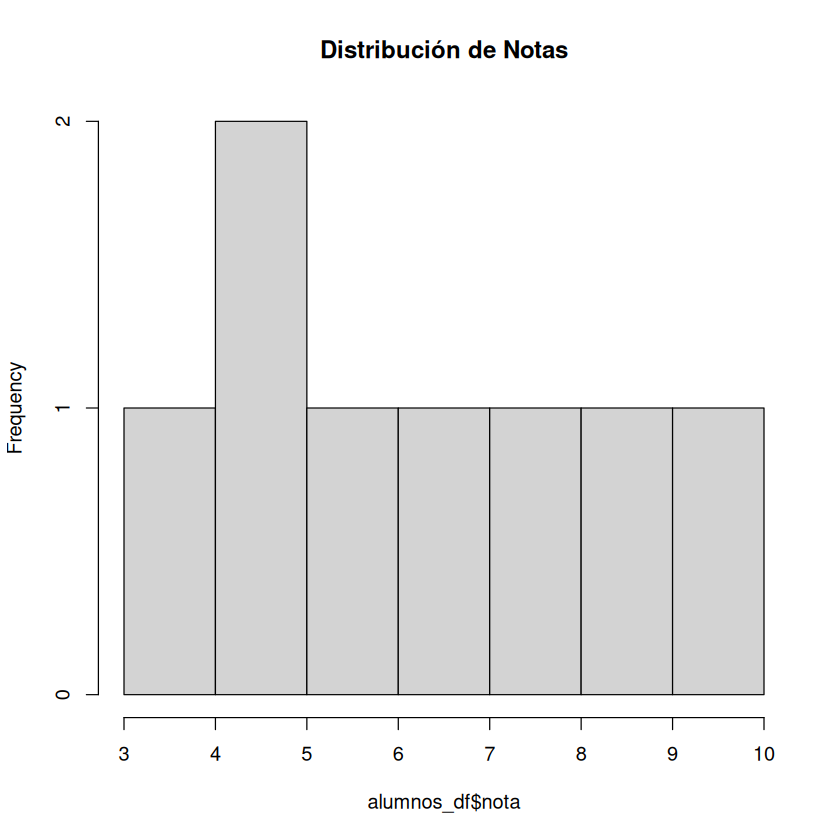

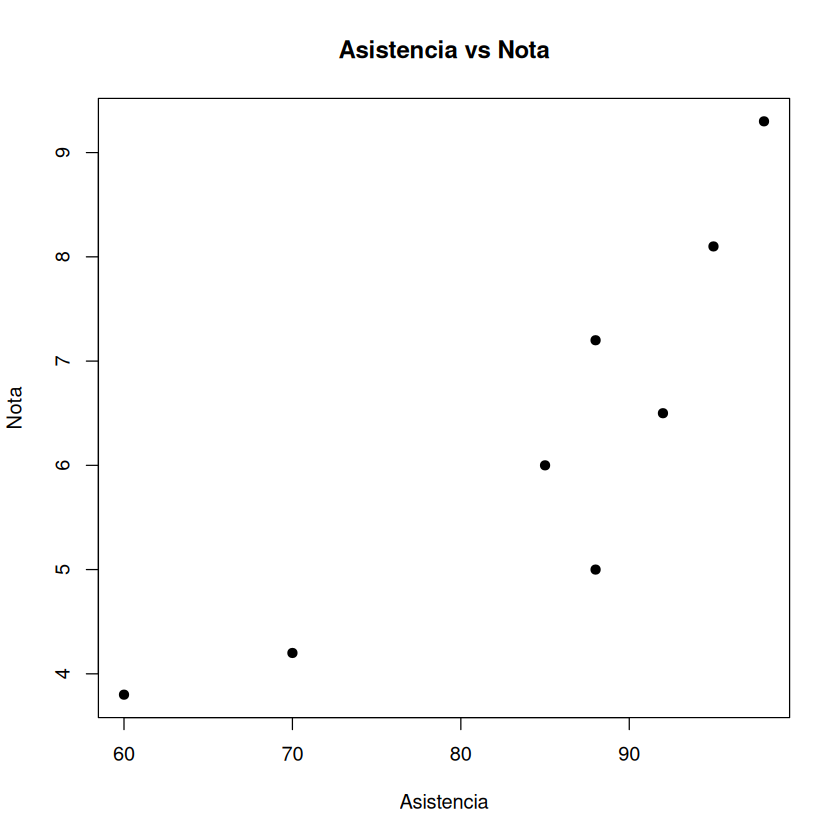

In [14]:
hist(alumnos_df$nota, main = "Distribución de Notas")

plot(alumnos_df$asistencia, alumnos_df$nota, pch = 19,
     xlab = "Asistencia", ylab = "Nota",
     main = "Asistencia vs Nota")

---

## Ejercicio 1 — Análisis de Sensores (pipeline)

Tienes  datos de sensores de un edificio en el archivo sensores.csv. 


**Tu tarea:**
Cargar el fichero sensores.csv.

Usando el operador tubería `|>`, crea un nuevo data frame llamado `alertas` que cumpla todo esto a la vez:

1. **Filtra** las zonas donde la temperatura sea mayor a 24 grados.
2. **Crea** una columna nueva llamada `temp_kelvin` ().
3. **Ordena** los resultados por temperatura (de mayor a menor).
4. **Selecciona** solo la columna `zona` y `temp_kelvin`.


In [23]:
library(dplyr)

sensores <- read.csv("./data/sensores.csv")

alertas <- sensores |>
  filter(temp > 24) |>
  mutate(temp_kelvin = temp + 273.15) |>
  arrange(desc(temp)) |>
  select(zona, temp_kelvin)

alertas

zona,temp_kelvin
<chr>,<dbl>
A,318.15
C,309.65
C,308.15
C,307.15
C,306.65
C,305.15
C,304.65
A,304.15
A,303.65


> 💡 Si te sale `could not find function "alertas"`, normalmente es porque:
>
> * no has asignado `alertas <- ...` correctamente, o
> * dejaste la tubería “a medias”. Termina la tubería y vuelve a ejecutar.

**Reto (avanzado)**: añade una columna `nivel_alerta`:

* `"ALTA"` si temp > 27
* `"MEDIA"` si temp entre 24 y 27

## Ejercicio 2 — Limpieza y creación de variable (preprocesado)

Leer el dataset alumnos.csv con las columnas id_alumno,nombre,edad,nota

Crea un data frame `alumnos_limpio` donde:

1. `nota` esté entre 0 y 10 (si no, pon `NA`)
2. Crea `nota_norm = nota/10`
3. Filtra filas con `!is.na(nota)`

*(Pista: `if_else()`, `is.na()`)*

In [26]:
alumnos <- read.csv("./data/notas.csv")

alumnos_limpio <- alumnos |>
  mutate(nota = if_else(nota >= 0 & nota <= 10, nota, NA_real_)) |>
  mutate(nota_norm = nota / 10) |>
  filter(!is.na(nota))

alumnos_limpio

id_alumno,nombre,edad,nota,nota_norm
<int>,<chr>,<int>,<dbl>,<dbl>
1,Ana,18,7.5,0.75
2,Luis,19,6.2,0.62
3,Marta,18,8.1,0.81
4,Hugo,20,5.4,0.54
5,Sara,19,9.0,0.90
6,Noah,18,4.8,0.48
7,Elena,21,7.2,0.72
8,Iker,19,6.9,0.69
10,Diego,20,5.0,0.50


**Reto**: crea `riesgo = TRUE` si (nota < 5) O (asistencia < 80).


---

## Ejercicio 3 — Estadística por grupos (EDA previa a ML)

Con el dataset anterior.

1. Crea `tramo_edad` con valores `"17-18"` y `"19+"`
2. Agrupa por `tramo_edad` y calcula:

* `n`
* media de nota
* media de asistencia


In [28]:
alumnos <- read.csv("./data/notas.csv")

alumnos |>
  mutate(tramo_edad = if_else(edad <= 18, "17-18", "19+")) |>
  group_by(tramo_edad) |>
  summarise(
    n = n(),
    media_nota = mean(nota, na.rm = TRUE)
  )

tramo_edad,n,media_nota
<chr>,<int>,<dbl>
17-18,16,7.307692
19+,31,6.782143


**Reto**: ordena los tramos por media de nota (desc).


---

## Ejercicio 4 — Práctica “empresa web”

Dato el siguiente Dataset con los siguientes datos

id_cliente,visitas_web,tiempo_min,compra


Tarea:

1. Leer el dataset visitas_web.csv
2. Hacer inspección rápida del dataset 
3. Filtra los que compran (`compra == TRUE`)
4. Agrupar por compras y calcular la media de `visitas_web` y `tiempo_min`
5. Crear una nueva columna para crear una variable categorica que sea
    "Nula" cero visitas
    "Baja"menor que cinco
    "Media" menor quedoce
    "Alta" igual o mayor que doce
6. Mostrar un gráfico que compare las visitas a la web con que finalmente compre
7. Exporta dataset a un nuevo fichero CSV

Ten en cuenta que puede contenter datos faltantes y algún outlier.

   id_cliente      visitas_web        tiempo_min       compra       
 Min.   :  1.00   Min.   :  0.000   Min.   :  0.00   Mode :logical  
 1st Qu.: 25.75   1st Qu.:  3.000   1st Qu.:  7.00   FALSE:45       
 Median : 50.50   Median :  6.000   Median : 15.00   TRUE :55       
 Mean   : 50.50   Mean   :  8.899   Mean   : 24.61                  
 3rd Qu.: 75.25   3rd Qu.: 10.000   3rd Qu.: 29.50                  
 Max.   :100.00   Max.   :200.000   Max.   :500.00                  
                  NA's   :1         NA's   :1                       

'data.frame':	100 obs. of  4 variables:
 $ id_cliente : int  1 2 3 4 5 6 7 8 9 10 ...
 $ visitas_web: int  5 8 2 15 1 20 7 3 12 4 ...
 $ tiempo_min : int  12 25 5 40 3 60 18 7 35 10 ...
 $ compra     : logi  TRUE TRUE FALSE TRUE FALSE TRUE ...


media_visitas,media_tiempo
<dbl>,<dbl>
14.03704,39.37037


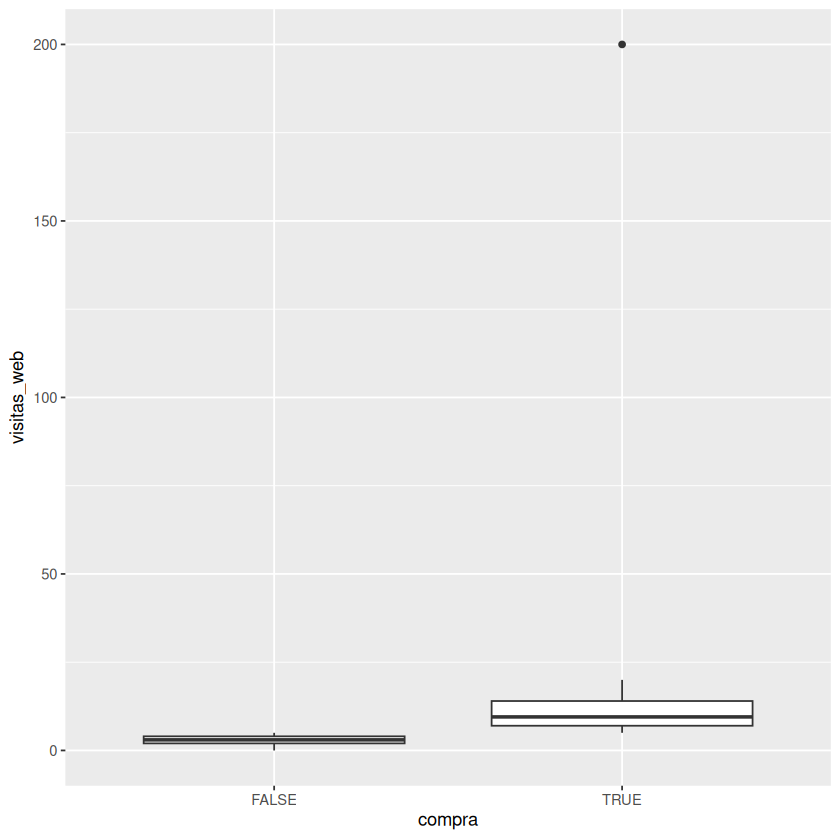

In [30]:
library(dplyr)
library(ggplot2)

df <- read.csv("./data/visitas_web.csv")

summary(df)
str(df)

df_procesado <- df |>
  filter(!is.na(visitas_web), !is.na(tiempo_min)) |>
  mutate(categoria_visitas = case_when(
    visitas_web == 0 ~ "Nula",
    visitas_web < 5 ~ "Baja",
    visitas_web < 12 ~ "Media",
    TRUE ~ "Alta"
  ))

df_procesado |>
  filter(compra == TRUE) |>
  summarise(
    media_visitas = mean(visitas_web, na.rm = TRUE),
    media_tiempo = mean(tiempo_min, na.rm = TRUE)
  )

ggplot(df_procesado, aes(x = compra, y = visitas_web)) +
  geom_boxplot()

write.csv(df_procesado, "visitas_procesado.csv", row.names = FALSE)

---

### Resumen para Pythonistas

| Acción | Pandas (Python) | Tidyverse (R) |
| --- | --- | --- |
| **Encadenar** | `.` (puntos) | `%>%` (pipe) |
| **Columnas** | `df[['col']]` | `select(col)` |
| **Filas** | `df[df['col']>0]` | `filter(col > 0)` |
| **Crear** | `df['new'] = ...` | `mutate(new = ...)` |
| **Ordenar** | `sort_values()` | `arrange()` |
